# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import random
import numpy as np
import pandas as pd

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice(n):
    outcomes= []
    for i in range(n):
        choice = random.randint(1, 6)
        outcomes.append(choice)
    return pd.DataFrame(outcomes, columns =['Outcomes'])
dice_df = dice(10)

In [3]:
dice_df

,Outcomes
0,2
1,5
2,4
3,4
4,1
5,1
6,2
7,3
8,6
9,4


#### 2.- Plot the results sorted by value.

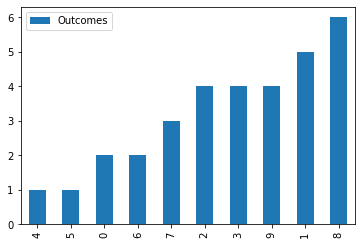

In [23]:
dice_df.sort_values('Outcomes').plot(kind = 'bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

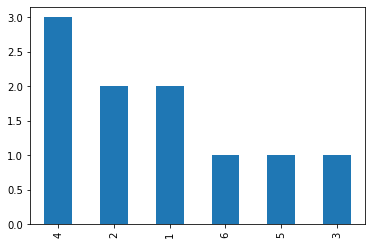

In [5]:
dice_df['Outcomes'].value_counts().plot(kind = 'bar')

In [6]:
"""
plot number one is mapping the value of the dice roll at each time the dice was rolled (The second roll, the outcome was 5)
Plot number two choes the frequency or number of time that each number was rolled (the outcome 1 has been rolled three times).
"""

'\nplot number one is mapping the value of the dice roll at each time the dice was rolled (The second roll, the outcome was 5)\nPlot number two choes the frequency or number of time that each number was rolled (the outcome 1 has been rolled three times).\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def mean(lst):
    return sum(lst) / lst.count()
mean(dice_df['Outcomes'])

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
freq_df = pd.DataFrame(dice_df['Outcomes'].value_counts())
freq_df.columns = ['Frequency']
freq_df

,Frequency
4,3
2,2
1,2
6,1
5,1
3,1


In [9]:
mean(freq_df['Frequency'])

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
def median(lst):
    sort = sorted(lst)
    Length = len(lst)
    index = (Length-1) // 2

    if (Length % 2):
        return sort[index]
    else:
        return (sort[index] + sort[index + 1])/2.0
median(dice_df['Outcomes'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
np.percentile(dice_df['Outcomes'], [25, 50, 75])

array([2. , 3.5, 4. ])

In [12]:
def quartile_1(l):
    return sorted(l)[int(len(l) * .25)]

def median_2(l):
    return sorted(l)[int(len(l)/2)]

def quartile_3(l):
    return sorted(l)[int(len(l) * .75)]

print(quartile_1(dice_df['Outcomes']))
print(median_2(dice_df['Outcomes']))
print(quartile_3(dice_df['Outcomes']))

2
4
4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [13]:
data = pd.read_csv("roll_the_dice_hundred.csv")

In [14]:
data.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [15]:
data = data.drop(columns=['Unnamed: 0', 'roll'])

In [16]:
data.head()

,value
0,1
1,2
2,6
3,1
4,6


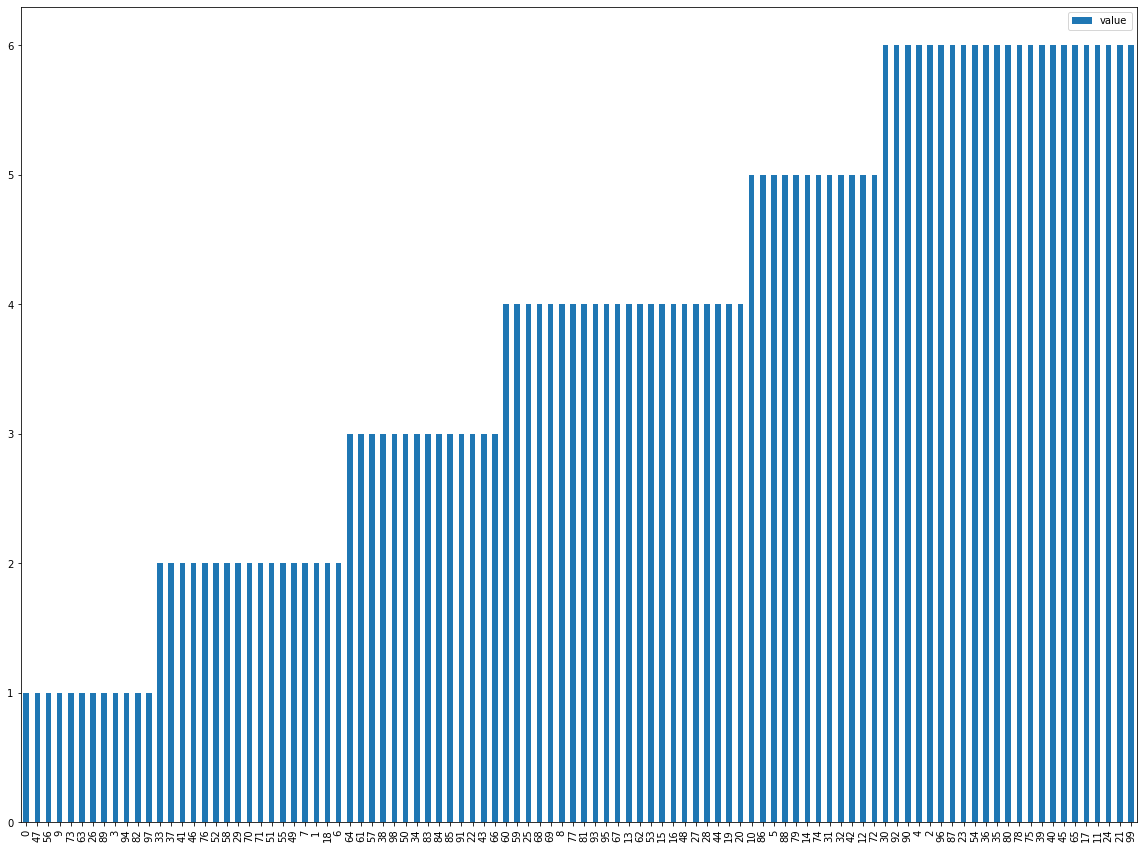

In [74]:
data.sort_values('value').plot(kind = 'bar', figsize=(20,15))

In [18]:
"""
I had to delete the two columns (trial and unnamed) because they were the same as the index.

From the above plot I can see that it is plotting the number of time each outcome (1,2,3,4,5,6) appeared in the 100 trials.
"""

'\nI had to delete the two columns (trial and unnamed) because they were the same as the index.\n\nFrom the above plot I can see that it is plotting the number of time each outcome (1,2,3,4,5,6) appeared in the 100 trials.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [19]:
def mean(lst):
    return sum(lst) / lst.count()
mean(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [20]:
freq_data = pd.DataFrame(data['value'].value_counts())
freq_data.columns = ['Frequency']
freq_data

,Frequency
6,23
4,22
2,17
3,14
5,12
1,12


In [21]:
mean(freq_data['Frequency'])

16.666666666666668

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

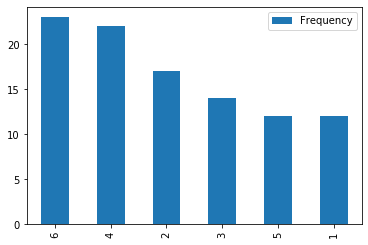

In [72]:
freq_data.plot(kind = 'bar')

In [ ]:
"""
Plot above shows the frequency or number of time that each number was rolled (the outcome 5 has been rolled 12 times).
The plot is right scewed.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [25]:
data1 = pd.read_csv("roll_the_dice_thousand.csv")

In [27]:
data1 = data1.drop(columns=['Unnamed: 0', 'roll'])

In [28]:
data1.head()

,value
0,5
1,6
2,1
3,6
4,5


In [29]:
freq_data1 = pd.DataFrame(data1['value'].value_counts())
freq_data1.columns = ['Frequency']
freq_data1

,Frequency
3,175
1,175
4,168
2,167
6,166
5,149


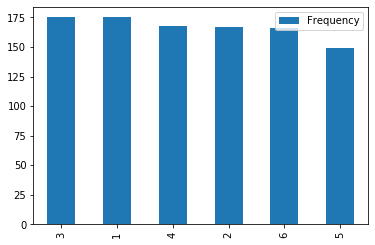

In [65]:
freq_data1.plot(kind = 'bar')

In [ ]:
"""
Plot above shows the frequency or number of time that each number was rolled (the outcome 5 has been rolled 149 times).
The plot is uniform with almost equal probability distributions between the outcomes.

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [32]:
ages_population = pd.read_csv("ages_population.csv")

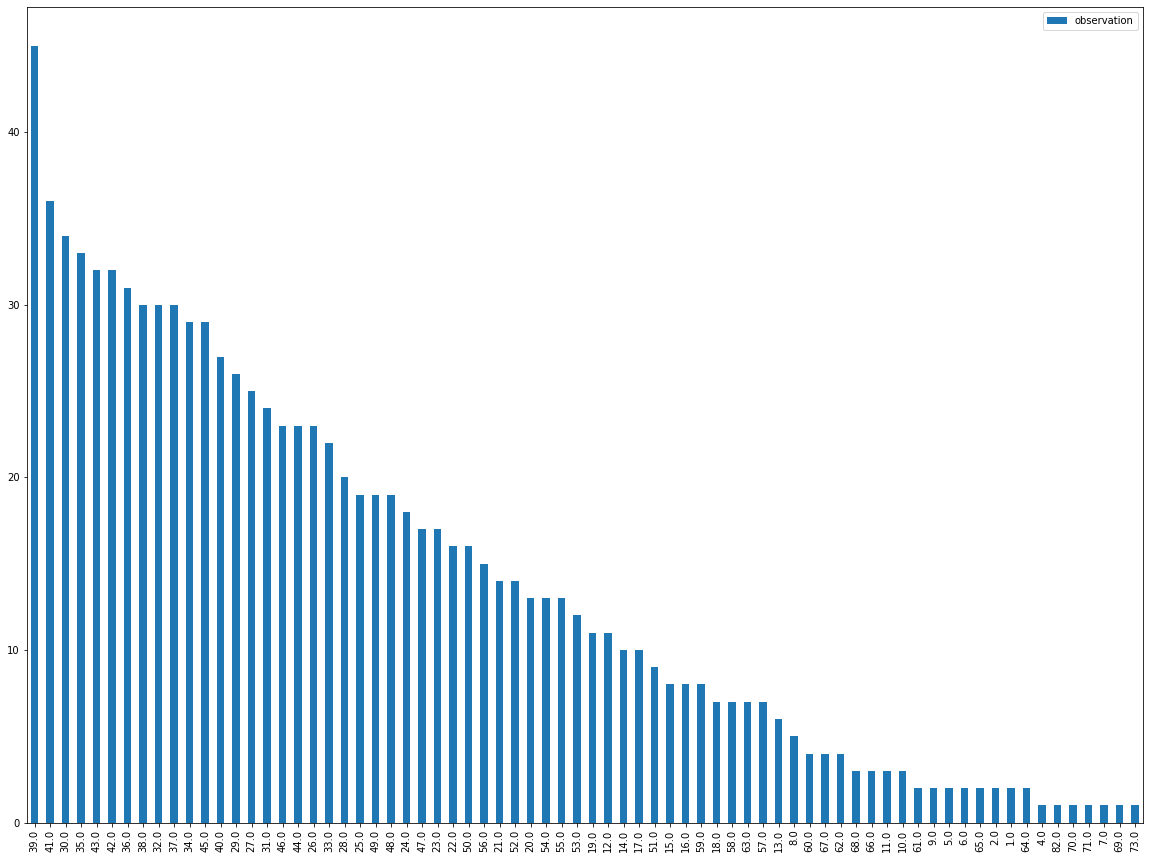

In [64]:
freq_ages_population = pd.DataFrame(ages_population['observation'].value_counts())
freq_ages_population.plot(kind = 'bar', figsize=(20,15))

In [ ]:
#The plot is right skewed.
#The mean will be around 33 (x-axis)
#The standard deviation will be to the left of the graph, where most of the frequency is higher.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [61]:
freq_ages_population.describe()

,observation
count,72.000000
mean,13.888889
std,11.261996
min,1.000000
25%,3.000000
50%,11.500000
75%,23.000000
max,45.000000


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [54]:
ages_population2 = pd.read_csv("ages_population2.csv")

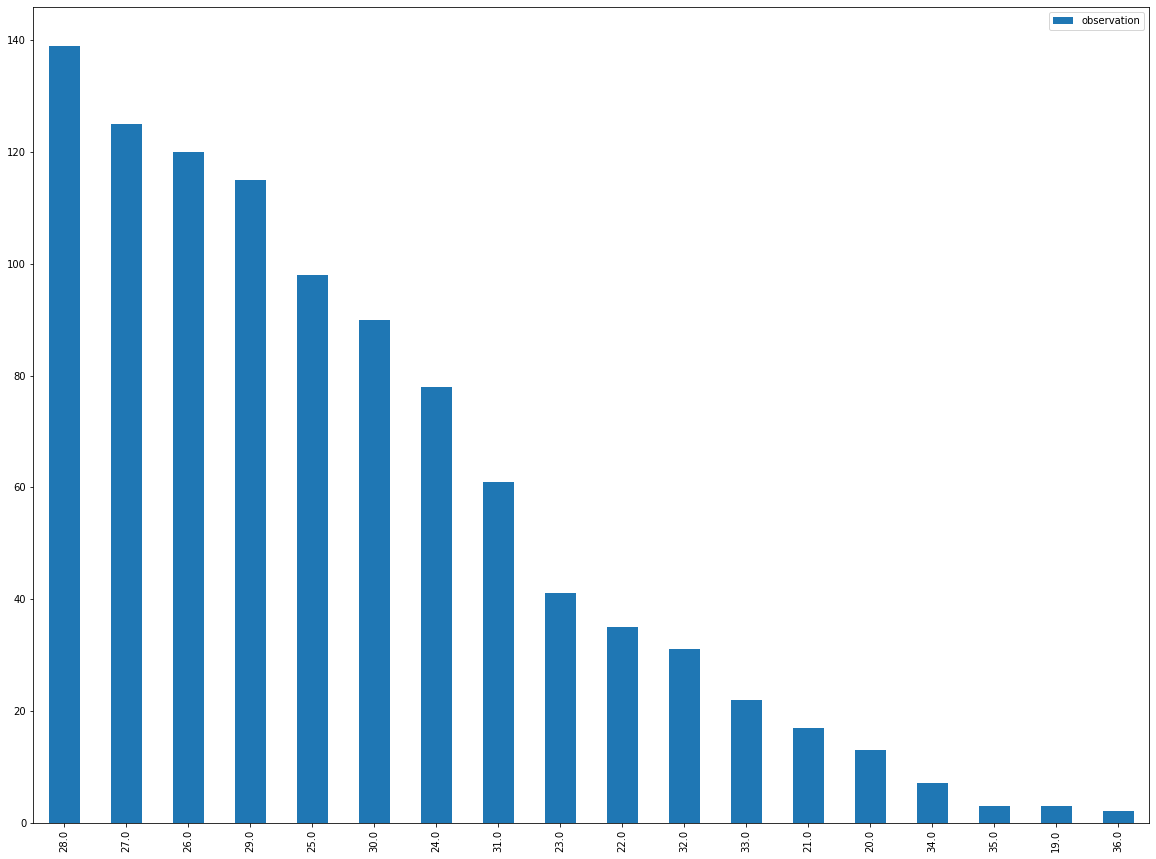

In [79]:
freq_ages_population2 = pd.DataFrame(ages_population2['observation'].value_counts())
freq_ages_population2.plot(kind = 'bar', figsize=(20,15))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [75]:
"""
It is the same as the other example, but the data districution is less, this time there are only 18 variables
"""

'\nIt is the same as the other example, but the data districution is less, this time there are only 18 variables\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [76]:
freq_ages_population2.describe()

,observation
count,18.000000
mean,55.555556
std,48.144662
min,2.000000
25%,14.000000
50%,38.000000
75%,96.000000
max,139.000000


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [77]:
ages_population3 = pd.read_csv("ages_population3.csv")

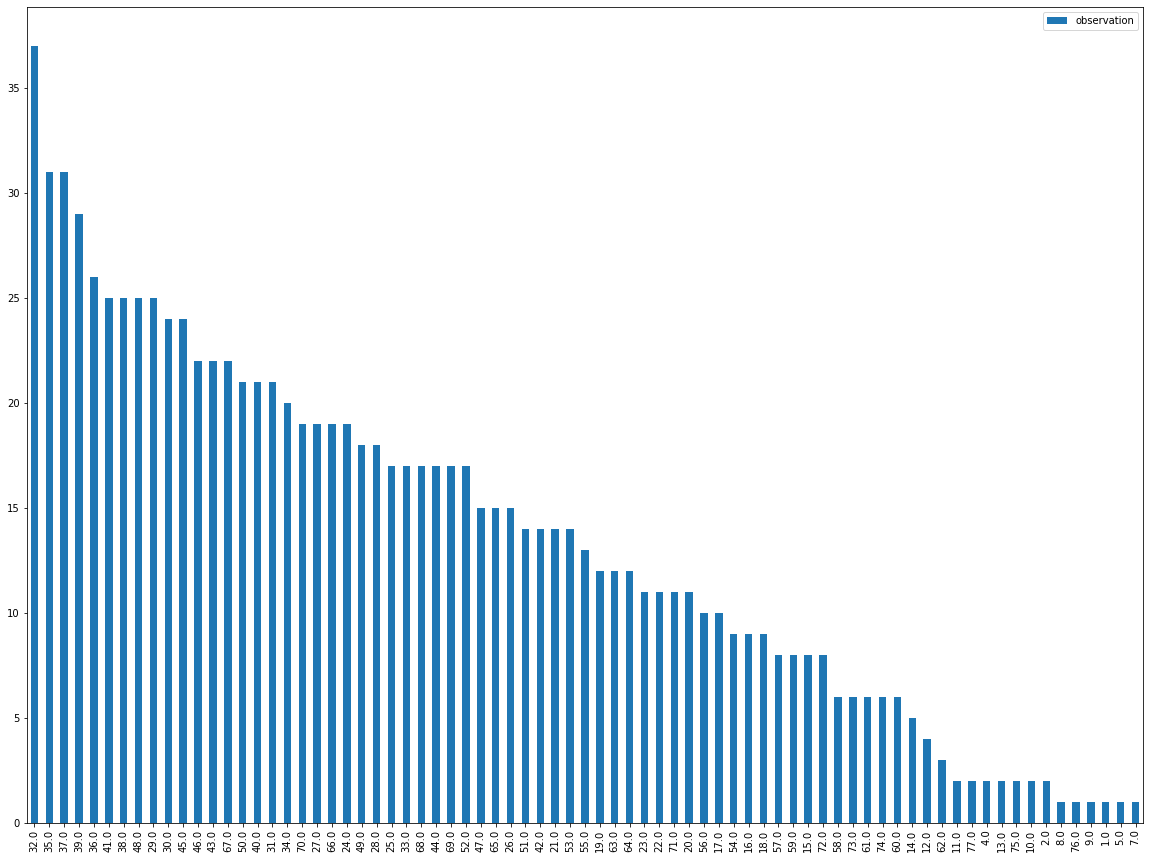

In [80]:
freq_ages_population3 = pd.DataFrame(ages_population3['observation'].value_counts())
freq_ages_population3.plot(kind = 'bar', figsize=(20,15))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [81]:
freq_ages_population3.describe()

,observation
count,75.000000
mean,13.333333
std,8.726061
min,1.000000
25%,6.000000
50%,13.000000
75%,19.000000
max,37.000000


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [87]:
print('Median value is: ',freq_ages_population3.median())
print('Mean value is: ',freq_ages_population3.mean())
print('Standerd deviation is: ',freq_ages_population3.std())

Median value is:  observation    13.0
dtype: float64
Mean value is:  observation    13.333333
dtype: float64
Standerd deviation is:  observation    8.726061
dtype: float64


In [ ]:
"""
There is not that much difference between the mean and the median, they are almos the same.
Because the skew is smoother than the first example and the data is more distributed as well.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [89]:
freq_ages_population3.quantile([0.1, 0.25, 0.5, 0.75, 0.9])

,observation
0.10,2.0
0.25,6.0
0.50,13.0
0.75,19.0
0.90,25.0


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""